In [1]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [2]:
print(reg.coef_)

[0.34545455 0.34545455]


In [3]:
reg.intercept_

0.1363636363636364

In [4]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# 生成数据
# # X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# 计算paths
n_alphs = 200
alphas = np.logspace(-10, -2, n_alphs)

coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# 绘制结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # 反转axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()


# 文本分类

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = ["alt.atheism","talk.religion.misc","comp.graphics","sci.space"]

def size_mb(docs):
    """计算文本有几M"""
    return sum(len(s.encode('utf-8')) for s in docs)/1e6

def load_dataset(verbose=False, remove=()):
    """加载和矢量化 20 个新闻组数据集"""
    data_train = fetch_20newsgroups(subset="train", categories=categories,shuffle=True,random_state=42,remove=remove)
    data_test = fetch_20newsgroups(subset="test", categories=categories,shuffle=True,random_state=42,remove=remove)
    target_names = data_train.target_names
    y_train, y_test = data_train.target, data_test.target

    t0 = time()
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:

        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names




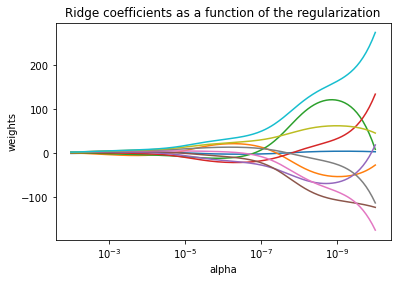

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# 生成数据
# # X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# 计算paths
n_alphs = 200
alphas = np.logspace(-10, -2, n_alphs)

coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# 绘制结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # 反转axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()


# 文本分类

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

categories = ["alt.atheism","talk.religion.misc","comp.graphics","sci.space"]

def size_mb(docs):
    """计算文本有几M"""
    return sum(len(s.encode('utf-8')) for s in docs)/1e6

def load_dataset(verbose=False, remove=()):
    """加载和矢量化 20 个新闻组数据集"""
    data_train = fetch_20newsgroups(subset="train", categories=categories,shuffle=True,random_state=42,remove=remove)
    data_test = fetch_20newsgroups(subset="test", categories=categories,shuffle=True,random_state=42,remove=remove)
    target_names = data_train.target_names
    y_train, y_test = data_train.target, data_test.target

    t0 = time()
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:

        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names


